In [33]:
import requests
import shutil
import os
import matplotlib.pyplot as plt

# Getting training data

We get our data to train our model from the [GTSRB](https://benchmark.ini.rub.de/gtsrb_dataset.html)
(German Traffic Sign Recognition Benchmark).

Here we download and unzip the training dataset to our 'data' directory.

In [12]:
data_dir = '../data/'
if not os.path.exists(data_dir):
        os.makedirs(data_dir)

zip_dir = '../data/GTSRB_Final_Training_Images.zip'
train_dir = '../data/train/'
image_dir = train_dir + 'GTSRB/Final_Training/Images/'

url = 'https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip'
response = requests.get(url)

with open(zip_dir, 'wb') as file:
    file.write(response.content)

shutil.unpack_archive(zip_dir, train_dir)
os.remove(zip_dir)

KeyboardInterrupt: 

# Inspecting the data
## Class skew
Now we are going to take a look around the data to get familiar with the dataset itself. First, let's look at how the
data is distributed across our different classes.

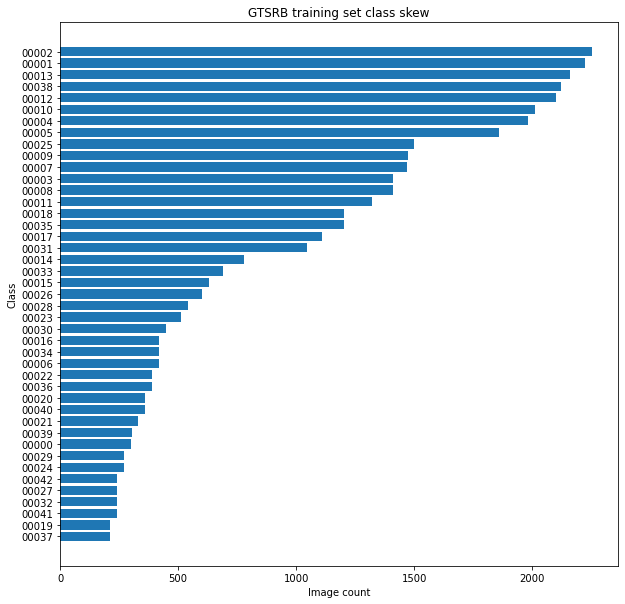

In [53]:
folders = (folder for folder in os.listdir(image_dir) if folder != '.DS_Store')

image_counts = []
for folder in folders:
    # Each directory also has a csv file - we exclude this as we are only interested in the number of pictures at the moment
    images = [image for image in os.listdir(os.path.join(image_dir, folder)) if image.endswith('.ppm')]
    image_counts.append((folder, len(images)))

image_counts.sort(key=lambda tup:tup[1])

classes = [x[0] for x in image_counts]
image_count = [x[1] for x in image_counts]

plt.subplots(figsize=(10, 10))
plt.barh(classes, image_count)
plt.title('GTSRB training set class skew')
plt.ylabel('Class')
plt.xlabel('Image count')
plt.show()

As we can see, there are a lot more pictures in class 00002 (which would be a speed limit 50 sign) than for example in
class 00037 (turn ahead or left).
Skewed classes can be a problem, because our model gets to see a lot more pictures of certain classes than of others
when training later on.

As far as I know this can be mitigated by using certain error functions, but for now we will pretend like we never heard
of this before.

## Label map
While the plot above shows us how many pictures we have for each class, it doesn't tell us which classes those numbers
actually are. To make these class names human-readable, let's introduce a label map.

## Sample pictures
Let's plot some sample pictures of each class so we roughly know with what kind of data or pictures we are dealing with.